# WeRateDogs Twitter Analysis

### By Gbemisola Adekoya

## Introduction

> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc(It the uniqueness of weratedog). WeRateDogs has over 4 million followers(as at August 1, 2017) and has received international media coverage.

>**Goal**: This project analyses how Weratedogs rate dogs and the most commonly rated dogs while practicing data wrangling skills.

## Contents
<ul>
<li><a href="#import">Importing Libaries</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#analyze">Analysis & Visualization</a></li>
</ul>

<a id='import'></a>
## 1. Importing Libaries

In [1245]:
import time
import tweepy
import requests
import json
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth', None)

<a id='gather'></a>
## 2. Data Gathering
> Data used for this analysis came from three sources:
>* Twitter archive enhanced file: this is a csv file provided by udacity and was downloaded manually. It originally contained 5000+ basic information about weratedogs tweet data (tweet ID, timestamp, text, etc.) as at August 1, 2017 and was sent to udacity. Modifications have been made from the tweet's text column and was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make the Twitter archive "enhanced." Also, of the 5000+ tweets, they have been filtered for tweets with ratings reducing the data to 2356 tweets.

>* Tweet image Predictions: along every tweet weratedogs post about dogs comes the picture of the dog. This data source(hosted on Udacity servers) contains the result of image predictions ran by udacity through a neural network that can classify breed of dogs.

>* Additional data from twitter API using tweepy: important information like favorite counts and retweet count were missing from the twitter archive enhanced file. I queried Twitter API to get the additional data for this analysis. 

> #### Reading twitter archive enhanced file into pandas dataframe

In [1246]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


> #### Using Requests to get Image prediction file and downoading file programmatically

In [1247]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
response.status_code

200

In [1248]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [1249]:
# Reading file into a pandas dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


>* tweet_id: last part of the tweet URL after "status/" e.g https://twitter.com/dog_rates/status/889531135344209921
>* jpg_url: image url
>* img_num: image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
>* p1: the algorithm's #1 prediction for the image in the tweet 
>* p1_conf: how confident the algorithm is in its #1 prediction
>* p1_dog: whether or not the #1 prediction is a breed of dog
>* p2: the algorithm's #2 prediction for the image in the tweet
>* p2_conf: how confident the algorithm is in its #2 prediction
>* p2_dog: whether or not the #2 prediction is a breed of dog
>* p3: the algorithm's #3 prediction for the image in the tweet
>* p3_conf: how confident the algorithm is in its #3 prediction
>* p3_dog: whether or not the #3 prediction is a breed of dog

> #### Gathering Additional data from Twitter API

In [1250]:
# Access keys and codes from Twitter Developer Account
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [1251]:
# Create Object to query twitter data
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [1252]:
# Making an array of the tweets IDs
tweet_ids = tweet_archive['tweet_id'].values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [1253]:
# Sample of data
status = api.get_status(892420643555336193, tweet_mode='extended')
status

Status(_api=<tweepy.api.API object at 0x0000022460D77D30>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 

In [1254]:
# Looping through each tweet id to get additional data
start = time.time()    # Calculates time taken to run query
count = 0
for tweet_id in tweet_ids:
    try:
        count +=1
        status = api.get_status(tweet_id, tweet_mode='extended')
        tweet_id = status.id                                       # retrieve tweet ID 
        retweet = status.retweet_count                             # retrieve number of retweets
        favorite = status.favorite_count                           # retrieve number of likes
        data = {'tweet_id': tweet_id, 'retweet':retweet, 'favorite':favorite}
        with open('tweet_json.txt', 'a') as textfile:              # Storing json data in a text file
            json.dump(data, textfile)
            textfile.write('\n')
            
        print(str(count) +'.' + ' ' + str(tweet_id) +':' + "Success")
        
    except :         # Some tweets corresponding to a few tweet IDs in the archive may have been deleted
        print(str(count) +'.' + ' ' + str(tweet_id) +':' + "Error")
        
end = time.time()
print('Time taken to run query:'+ str(end-start))      

1. 892420643555336193:Success
2. 892177421306343426:Success
3. 891815181378084864:Success
4. 891689557279858688:Success
5. 891327558926688256:Success
6. 891087950875897856:Success
7. 890971913173991426:Success
8. 890729181411237888:Success
9. 890609185150312448:Success
10. 890240255349198849:Success
11. 890006608113172480:Success
12. 889880896479866881:Success
13. 889665388333682689:Success
14. 889638837579907072:Success
15. 889531135344209921:Success
16. 889278841981685760:Success
17. 888917238123831296:Success
18. 888804989199671297:Success
19. 888554962724278272:Success
20. 888202515573088257:Error
21. 888078434458587136:Success
22. 887705289381826560:Success
23. 887517139158093824:Success
24. 887473957103951883:Success
25. 887343217045368832:Success
26. 887101392804085760:Success
27. 886983233522544640:Success
28. 886736880519319552:Success
29. 886680336477933568:Success
30. 886366144734445568:Success
31. 886267009285017600:Success
32. 886258384151887873:Success
33. 886054160059072

Rate limit reached. Sleeping for: 387


900. 758828659922702336:Success
901. 758740312047005698:Success
902. 758474966123810816:Success
903. 758467244762497024:Success
904. 758405701903519748:Success
905. 758355060040593408:Success
906. 758099635764359168:Success
907. 758041019896193024:Success
908. 757741869644341248:Success
909. 757729163776290825:Success
910. 757725642876129280:Success
911. 757611664640446465:Success
912. 757597904299253760:Success
913. 757596066325864448:Success
914. 757400162377592832:Success
915. 757393109802180609:Success
916. 757354760399941633:Success
917. 756998049151549440:Success
918. 756939218950160384:Success
919. 756651752796094464:Success
920. 756526248105566208:Success
921. 756303284449767430:Success
922. 756288534030475264:Success
923. 756275833623502848:Success
924. 755955933503782912:Success
925. 755206590534418437:Success
926. 755110668769038337:Success
927. 754874841593970688:Success
928. 754856583969079297:Success
929. 754747087846248448:Success
930. 754482103782404096:Success
931. 754

Rate limit reached. Sleeping for: 394


1800. 677187300187611136:Success
1801. 676975532580409345:Success
1802. 676957860086095872:Success
1803. 676949632774234114:Success
1804. 676948236477857792:Success
1805. 676946864479084545:Success
1806. 676942428000112642:Success
1807. 676936541936185344:Success
1808. 676916996760600576:Success
1809. 676897532954456065:Success
1810. 676864501615042560:Success
1811. 676821958043033607:Success
1812. 676819651066732545:Success
1813. 676811746707918848:Success
1814. 676776431406465024:Success
1815. 676617503762681856:Success
1816. 676613908052996102:Success
1817. 676606785097199616:Success
1818. 676603393314578432:Success
1819. 676593408224403456:Success
1820. 676590572941893632:Success
1821. 676588346097852417:Success
1822. 676582956622721024:Success
1823. 676575501977128964:Success
1824. 676533798876651520:Success
1825. 676496375194980353:Success
1826. 676470639084101634:Success
1827. 676440007570247681:Success
1828. 676430933382295552:Success
1829. 676263575653122048:Success
1830. 6762

In [1255]:
# Reading tweet_json file line by line 
data = []
with open('tweet_json.txt') as file:
    for line in file:
        data.append(json.loads(line))

In [1256]:
add_data = pd.DataFrame(data, columns = ['tweet_id', 'retweet', 'favorite'])
add_data

,tweet_id,retweet,favorite
0,892420643555336193,6968,33690
1,892177421306343426,5272,29205
2,891815181378084864,3464,21962
3,891689557279858688,7182,36738
4,891327558926688256,7713,35174
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


<a id='assess'></a>
## 3. Data Assessment

> #### Assessing Twitter archive enhanced file

In [1257]:
# Visual Assessment
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [1258]:
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
261,842846295480000512,NaN,NaN,2017-03-17 21:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He's wishing you a very fun and safe St. Pawtrick's Day. 13/10 festive af https://t.co/nFpNgCWWYs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295480000512/photo/1,13,10,Charlie,None,None,None,None
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ralpher. He's an East Guinean Flop Dog. Cuddly af. 12/10 https://t.co/rVOLuNRpjH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193018155009/photo/1,12,10,Ralpher,None,None,None,None
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kona. Yesterday she stopped by the department to see what it takes to be a police pupper. 12/10 vest was only a smidge too big https://t.co/j8D3PQJvpJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/827933404142436356/photo/1,https://twitter.com/dog_rates/status/827933404142436356/photo/1,https://twitter.com/dog_rates/status/827933404142436356/photo/1",12,10,Kona,None,None,pupper,None
589,799308762079035393,NaN,NaN,2016-11-17 17:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS https://t.co/7oQ1wpf…,7.743144e+17,4.196984e+09,2016-09-09 18:31:54 +0000,"https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1",14,10,None,None,None,None,None
1346,704480331685040129,NaN,NaN,2016-03-01 01:36:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Lucia. She's a Cumulonimbus Floofmallow. Only has two legs tho (unfortunate). 11/10 would definitely still pet https://t.co/qv6qlEUCEe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704480331685040129/photo/1,11,10,Lucia,None,None,None,None
817,770772759874076672,NaN,NaN,2016-08-30 23:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sebastian. He's super h*ckin fluffy. That's really all you need to know. 11/10 would snug intensely https://t.co/lqr0NdtwQo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759874076672/photo/1,11,10,Sebastian,None,None,None,None
2108,670452855871037440,NaN,NaN,2015-11-28 04:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog can't see its haters. 11/10 https://t.co/35BcGFdEAK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670452855871037440/photo/1,11,10,None,None,None,None,None
1078,739485634323156992,NaN,NaN,2016-06-05 15:54:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kyle. He's a heavy drinker and an avid pot user. Just wants to be pupular. 6/10 I can't support this Kyle https://t.co/rRULp7XFnO,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/739485634323156992/photo/1,https://twitter.com/dog_rates/status/739485634323156992/photo/1",6,10,Kyle,None,None,None,None
1717,680191257256136705,NaN,NaN,2015-12-25 01:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a sleepy Christmas pupper 11/10 https://t.co/KXg0f8GNQ9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680191257256136705/photo/1,11,10,None,None,None,pupper,None
1845,67

In [1259]:
# Programmatic Assessment
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1260]:
# Checking if there are duplicates in entire data
tweet_archive.duplicated().sum()

0

In [1261]:
# Checking number of unique values in each columns
tweet_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [1262]:
# Checking data source
tweet_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1263]:
# Checking for retweets
tweet_archive[tweet_archive.retweeted_status_id.isnull() == False].text

19          RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX
32                                                                                                  RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
36               RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5
68        RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…
73      RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…
                                                                             ...                                                                      
1023      RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't ta

In [1264]:
# Checking for retweets - another method
retweet = tweet_archive[tweet_archive.text.str.contains('RT @')]
retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    181 non-null    int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   181 non-null    object 
 4   source                      181 non-null    object 
 5   text                        181 non-null    object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               180 non-null    object 
 10  rating_numerator            181 non-null    int64  
 11  rating_denominator          181 non-null    int64  
 12  name                        181 non-null    object 
 13  doggo                       181 n

In [1265]:
# Checking tweets that are replies
tweet_archive[tweet_archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [1266]:
# Checking empty expanded urls
sum(tweet_archive.expanded_urls.isna())

59

In [1267]:
# Checking total empty expanded urls that are replies
sum(tweet_archive.in_reply_to_status_id.notnull() & \
    tweet_archive.expanded_urls.isna())

55

In [1268]:
# Checking total empty expanded urls that are retweets
sum(tweet_archive.retweeted_status_id.notnull() & \
    tweet_archive.expanded_urls.isna())

1

In [1269]:
# Checking empty expanded urls that are not replies or retweets
sum(tweet_archive.expanded_urls.isna() & \
    (tweet_archive.retweeted_status_id.isnull() & \
    tweet_archive.in_reply_to_status_id.isnull()))

3

In [1270]:
rem_url= tweet_archive.expanded_urls.isna() & \
    (tweet_archive.retweeted_status_id.isnull() & \
    tweet_archive.in_reply_to_status_id.isnull())
tweet_archive[rem_url].tweet_id.values

array([828361771580813312, 785515384317313025, 696518437233913856],
      dtype=int64)

In [1271]:
# Checking if remaining empty expanded urls are in the image table
rem_url_id  = tweet_archive[rem_url].tweet_id.values
find_tweet_id = image_predictions.tweet_id.isin(rem_url_id)
sum(find_tweet_id)

0

In [1272]:
# Assessing name column
tweet_archive.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

In [1273]:
tweet_archive.name.value_counts().sample(60)

Lilah            1
Jarod            1
Roscoe           1
Aqua             1
Clybe            1
Ronduh           1
Moe              2
Boots            1
Crystal          2
Geno             1
Creg             1
Kane             1
Hamrick          1
Enchilada        1
Arnie            3
Taco             1
Luther           1
Nugget           1
actually         2
JD               1
Piper            2
Cleopatricia     1
Laika            1
Kendall          1
Bruiser          1
Olivia           2
Jeb              1
Lipton           1
Reese            3
Kayla            1
Al               1
Gabby            1
Willem           1
Rodney           1
Gordon           1
Todo             1
Tanner           1
a               55
Meyer            2
Brandonald       1
Monster          1
Striker          1
Jazzy            1
Wallace          3
Sephie           1
Ed               1
Chesterson       1
Hermione         1
Iroh             1
Chester          5
Tupawc           1
Longfellow       1
Covach      

In [1274]:
# Seems like most invalid names starts with lowercase and are pulled from in between words
tweet_archive[tweet_archive.name.str.contains('^[a-z]')].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [1275]:
tweet_archive[tweet_archive.name.str.contains('^[a-z]')].name.value_counts().sum()

109

In [1276]:
tweet_archive[tweet_archive.name == 'O'].text

775    This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
Name: text, dtype: object

In [1277]:
# Assessing rating denominator column
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [1278]:
den = tweet_archive.rating_denominator !=  10
tweet_archive[den][['in_reply_to_status_id','text', 'rating_denominator', 'rating_numerator']]

,in_reply_to_status_id,text,rating_denominator,rating_numerator
313,8.352460e+17,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0,960
342,8.320875e+17,@docmisterio account started on 11/15/15,15,11
433,NaN,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70,84
516,NaN,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7,24
784,NaN,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11,9
902,NaN,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150,165
1068,NaN,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11,9
1120,NaN,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170,204
1165,NaN,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20,4
1202,NaN,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


The above contains tweets whose denominators are not equals to 10. Some are replies or retweets(would be taken care of when replies and retweets are removed). Majority includes tweets with more than one dogs therefore the high numbers. 

Indices 1068,1165,1202, 1662,2335 are wrongly inputed

In [1279]:
# Assessing rating numerator column
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [1280]:
num_greater_14 = tweet_archive.rating_numerator > 14
tweet_archive[num_greater_14][['in_reply_to_status_id','text', 'rating_numerator', 'rating_denominator']]

,in_reply_to_status_id,text,rating_numerator,rating_denominator
55,8.816070e+17,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,8.558616e+17,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,8.558585e+17,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
285,NaN,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10
290,8.381455e+17,@markhoppus 182/10,182,10
291,8.380855e+17,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
313,8.352460e+17,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,NaN,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,NaN,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,NaN,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7


In [1281]:
num_zero = tweet_archive.rating_numerator == 0
tweet_archive[num_zero][['in_reply_to_status_id','text', 'rating_numerator', 'rating_denominator']]

,in_reply_to_status_id,text,rating_numerator,rating_denominator
315,NaN,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1016,7.468859e+17,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10


The above contains tweets whose numerators are greater than 14. Some are replies or retweets(would be taken care of when replies and retweets are removed). They are also some whose ratings are decimals and was wrongly inputed(Indices 695, 763, 1712). Others includes tweets with more than one dogs therefore the high numbers. 

Indices 1202 was wrongly inputed. 
Index 2074 is not a dog picture or rating.
Rating of '1776' was on America independence day with a dog in americas banner hence the humorous text and rating.
Rating of '0' (index 315)  is a reply to a plagarised tweet.

In [1282]:
tweet_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [1283]:
tweet_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [1284]:
tweet_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [1285]:
tweet_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

> #### Assessing Image predictions file

In [1286]:
# Visual assessment
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [1287]:
# Programmatic assessment
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1288]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1289]:
# Checking if tweet_id are unique
sum(image_predictions.tweet_id.duplicated())

0

In [1290]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [1291]:
image_predictions.p1.value_counts().sample(10)

wooden_spoon     1
clumber          1
wombat           4
Arctic_fox       4
Irish_setter     6
swab             1
kuvasz          16
giant_panda      1
EntleBucher      1
timber_wolf      1
Name: p1, dtype: int64

> #### Assessing Additional data

In [1292]:
add_data.sample(15)

,tweet_id,retweet,favorite
73,878316110768087041,5499,0
373,826204788643753985,855,4582
57,880935762899988482,2325,14989
1216,711743778164514816,906,2611
1298,706153300320784384,343,1352
7,890729181411237888,15676,56640
2265,667138269671505920,1861,3998
1558,686760001961103360,1254,3235
2012,671542985629241344,483,966
156,860276583193509888,3056,16521


In [1293]:
add_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2327 non-null   int64
 1   retweet   2327 non-null   int64
 2   favorite  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [1294]:
add_data.nunique()

tweet_id    2327
retweet     1653
favorite    1985
dtype: int64

> ##### Quality Issues
> ###### `tweet_archive` table
> * Data includes retweets(values in retweeted_status_id)
> * Data also includes replies 
> * Missing data from the expanded_urls column.
> * Some rows in the name column have invalid values as names e.g 'a', 'an'."They begin in lowercase and are pulled from in between words.
> * Rating_denominator column contain wrong inputed ratings. Also includes some ourageous numbers(for tweets with multiple dogs)
> * Rating_numerator column contain wrong inputed ratings. Also includes some ourageous numbers(for tweets with multiple dogs).
> * Source column can be simplified(removing unnecessary text)
> * There are redundant zeros at end of timestamp
> * Timestamp is the wrong datatype(object)

> ###### `image_predictions` table
> * There are underscores between words instead of space

> ##### Tidiness Issues
> * Doggo, floofer, pupper, puppo should be one column "dog stage"
> * A single column of the most accurate prediction can be made from the 3 predictions of dog
> * `add_data` should be part of the `tweet_archive` table
> * Columns in `image_predictions` should be part of `tweet_archive` table to have a complete master table for analysis

<a id='clean'></a>
## 4. Data Cleaning

In [1295]:
# First make a copy of the data
tweet_archive_clean = tweet_archive.copy()
image_predictions_clean = image_predictions.copy()
add_data_clean = add_data.copy()

> ##### `tweet_archive:` Data includes retweets
> ##### Define
> Get index of rows whose tweets are retweets and not original tweets then drop

> ##### Code

In [1296]:
retweet = tweet_archive_clean[tweet_archive_clean.text.str.contains('RT @')]
tweet_archive_clean.drop(retweet.index, axis = 0, inplace = True)

>  ##### Test

In [1297]:
# Checking if they were removed
sum(tweet_archive_clean.text.str.contains('RT @'))

0

> ##### `tweet_archive:` Data includes replies
> ##### Define
> Get index of rows whose tweets are replies and not original tweets then drop

> ##### Code

In [1298]:
replies = tweet_archive_clean[tweet_archive_clean.in_reply_to_status_id.notnull()]
tweet_archive_clean.drop(replies.index, axis = 0, inplace = True)

>  ##### Test

In [1299]:
sum(tweet_archive_clean.in_reply_to_status_id.notnull())

0

In [1300]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

> ##### `tweet_archive:` Null values in expanded_Urls column
> ##### Define
> * Drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
> * Drop remaining null values in expanded_urls since they are also not included in the image_predictions table.(they would be removed anyways during joining)
> ##### Code

In [1301]:
tweet_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [1302]:
tweet_archive_clean.dropna(inplace = True)

> ##### Test

In [1303]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


> ##### `tweet_archive:` Invalid names in the name column
> ##### Define
> * Replace invalid names with None
> * Correct name 'O' with O'Malley

> ##### Code

In [1304]:
invalid_names = tweet_archive_clean[tweet_archive.name.str.contains('^[a-z]')].name.value_counts()
invalid_names = list(invalid_names.index)
invalid_names

['a',
 'the',
 'an',
 'one',
 'very',
 'quite',
 'just',
 'getting',
 'not',
 'actually',
 'old',
 'light',
 'life',
 'officially',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'mad',
 'his',
 'my',
 'incredibly',
 'space']

In [1305]:
correct = [x.replace(x, 'None') for x in invalid_names]
correct

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None']

In [1306]:
tweet_archive_clean.name = tweet_archive_clean.name.replace(invalid_names, correct)

In [1307]:
tweet_archive_clean.name = tweet_archive_clean.name.replace('O', "O'Malley")

> ##### Test

In [1308]:
tweet_archive_clean.name.value_counts().head(20)

None       704
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         8
Daisy        7
Toby         7
Stanley      6
Bailey       6
Bo           6
Bella        6
Jax          6
Oscar        6
Koda         6
Scout        5
Name: name, dtype: int64

In [1309]:
tweet_archive_clean[tweet_archive_clean.name == "O"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> ##### `tweet_archive:` Wrongly inputed denominators
> ##### Define
> * Correct indices 1068(from 11 to 10), 1165(from 20 to 10), 1202(from 50 to 10), 1662(from 11 to 10) and 2335(from 2 to 10)
> * Drop index 516(has no rating)
> * Drop remaining rows whose denominator are not equal to 10.( They are ratings for multiple dogs and if used with the other data points for analysis will serve as outliers. Also they aren't much so we wont be losing too much data quality. 
 **Note:** This will also clean up some issues in the numerator column.

> ##### Code

In [1310]:
indices = [1068,1165, 1202, 1662, 2335]
tweet_archive_clean.loc[indices,'rating_denominator'] = 10

In [1311]:
den_clean = tweet_archive_clean.rating_denominator !=  10
tweet_archive_clean[den_clean][['text', 'rating_denominator', 'rating_numerator']]

,text,rating_denominator,rating_numerator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7,24
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150,165
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170,204
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90,99
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50,45
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50,60
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40,44
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,110,121


In [1312]:
tweet_archive_clean[den_clean].index

Int64Index([433, 516, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1635, 1779,
            1843],
           dtype='int64')

In [1313]:
# Drop index 516 (no rating) and remaining rows whose denominator not equal to 10
tweet_archive_clean.drop(tweet_archive_clean[den_clean].index, axis = 0, inplace = True)

> ##### Test

In [1314]:
(tweet_archive_clean.rating_denominator !=  10).sum()

0

In [1315]:
tweet_archive_clean.rating_denominator.value_counts()

10    2082
Name: rating_denominator, dtype: int64

> ##### `tweet_archive:` Wrongly inputed numerators
> ##### Define
> * Correct indices 1068(from 9 to 14), 1165(from 4 to 13), 1202(from 50 to 11), 1662(from 7 to 10) and 2335(from 1 to 9)
> * Correct indices 695(from 75 to 9.75), 763(from 27 to 11.27), 1712(from 26 to 11.26)
> * Drop remaining rows(numerator 1776 & 420 - if used will serve as outlier)
> * Drop row with 0 as numerator

> ##### Code

In [1316]:
indices = [1068,1165, 1202, 1662, 2335, 695, 763, 1712]
replace = [14, 13, 11, 10, 9, 9.75, 11.27, 11.26]
tweet_archive_clean.loc[indices,'rating_numerator'] = replace

In [1317]:
# Remaining rows with numerator > 14
num_clean = tweet_archive_clean.rating_numerator > 14
tweet_archive_clean[num_clean][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0,10


In [1318]:
# Drop remaining rows whose numerator > 14
tweet_archive_clean.drop(tweet_archive_clean[num_clean].index, axis = 0, inplace = True)

In [1319]:
# Drop row whose rating_numerator = 0
tweet_archive_clean.drop(index=315, inplace= True)

> ##### Test

In [1320]:
tweet_archive_clean.loc[indices,'rating_numerator']

1068    14.00
1165    13.00
1202    11.00
1662    10.00
2335     9.00
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

In [1321]:
tweet_archive_clean.rating_numerator.value_counts()

12.00    485
10.00    435
11.00    414
13.00    288
9.00     153
8.00      98
7.00      51
14.00     39
5.00      34
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
11.26      1
9.75       1
11.27      1
Name: rating_numerator, dtype: int64

In [1322]:
tweet_archive_clean[tweet_archive_clean.rating_numerator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> ##### Drop rating_denominator column and rename rating_numerator column

In [1323]:
tweet_archive_clean.drop(columns = 'rating_denominator', inplace = True)

In [1324]:
tweet_archive_clean.rename(columns = {'rating_numerator' : 'rating'}, inplace = True)

> ##### Test

In [1325]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2079 non-null   int64  
 1   timestamp      2079 non-null   object 
 2   source         2079 non-null   object 
 3   text           2079 non-null   object 
 4   expanded_urls  2079 non-null   object 
 5   rating         2079 non-null   float64
 6   name           2079 non-null   object 
 7   doggo          2079 non-null   object 
 8   floofer        2079 non-null   object 
 9   pupper         2079 non-null   object 
 10  puppo          2079 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 259.4+ KB


> ##### `tweet_archive:` Clean Source column
> ##### Define
> Extract tweet source from source column :
> * Twitter for iphone
> * Twitter Web Client
> * TweetDeck
> * Vine

> ##### Code

In [1326]:
tweet_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1948
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [1327]:
tweet_archive_clean.source = tweet_archive_clean.source.str.extract(r'>(\D+)<')

> ##### Test

In [1328]:
tweet_archive_clean.source.value_counts()

Twitter for iPhone     1948
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

> ##### `tweet_archive:` Redundant zeros at end of timestamp
> ##### Define
> * Remove ''+0000 at end of timestamp

> ##### Code

In [1329]:
tweet_archive_clean.timestamp.value_counts()

2017-08-01 16:23:56 +0000    1
2016-01-08 04:46:13 +0000    1
2016-01-04 02:18:42 +0000    1
2016-01-04 03:18:23 +0000    1
2016-01-04 03:28:54 +0000    1
                            ..
2016-07-30 01:22:17 +0000    1
2016-07-30 17:51:13 +0000    1
2016-07-30 17:56:51 +0000    1
2016-07-31 01:12:26 +0000    1
2015-11-15 22:32:08 +0000    1
Name: timestamp, Length: 2079, dtype: int64

In [1330]:
tweet_archive_clean.timestamp = tweet_archive_clean.timestamp.apply(lambda x: x.split(' +')[0])

> ##### Test

In [1331]:
tweet_archive_clean.timestamp.value_counts()

2017-08-01 16:23:56    1
2016-01-08 04:46:13    1
2016-01-04 02:18:42    1
2016-01-04 03:18:23    1
2016-01-04 03:28:54    1
                      ..
2016-07-30 01:22:17    1
2016-07-30 17:51:13    1
2016-07-30 17:56:51    1
2016-07-31 01:12:26    1
2015-11-15 22:32:08    1
Name: timestamp, Length: 2079, dtype: int64

> ##### `tweet_archive:` timestamp is in wrong datatype
> ##### Define
> * Change timestamp datatype to datetime
> ##### Code

In [1332]:
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

> ##### Test

In [1333]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2079 non-null   int64         
 1   timestamp      2079 non-null   datetime64[ns]
 2   source         2079 non-null   object        
 3   text           2079 non-null   object        
 4   expanded_urls  2079 non-null   object        
 5   rating         2079 non-null   float64       
 6   name           2079 non-null   object        
 7   doggo          2079 non-null   object        
 8   floofer        2079 non-null   object        
 9   pupper         2079 non-null   object        
 10  puppo          2079 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 259.4+ KB


> ##### `image_predictions:` underscores between values
> ##### Define
> * Replace underscores with space
> ##### Code

In [1334]:
image_predictions_clean.replace('_', ' ', inplace = True, regex = True)

> ##### Test

In [1335]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1336]:
image_predictions_clean.p1.value_counts()

golden retriever      150
Labrador retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

> ##### `tweet_archive:` single field split into 4 columns
> ##### Define
> * Create mask to input Unknown anywhere doggo, floofer, puppo and pupper columns all equal None(This helps in dropping rows after melting them).
> * Using df.melt, unpivot the columns into a single columns
> * Then drop the rows that are equal to None to get the total amount of rows back

> ##### Code

In [1337]:
maskA = tweet_archive_clean['doggo'] == 'None' 
maskB = tweet_archive_clean['floofer'] == 'None'   
maskC = tweet_archive_clean['pupper'] == 'None'  
maskD = tweet_archive_clean['puppo'] == 'None'

In [1338]:
# if doggo, floofer, pupper and puppo == None, replace with 'Unknown' else 'leave as value in doggo column'
tweet_archive_clean['doggo'] = np.where(maskA & maskB & maskC & maskD, 'Unknown', tweet_archive_clean['doggo'])

In [1339]:
tweet_archive_clean = tweet_archive_clean.melt(id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating', 'name'], 
                         value_vars=['doggo' , 'floofer', 'pupper', 'puppo'], value_name='dog_stage')
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.dog_stage != "None"]
tweet_archive_clean = tweet_archive_clean.drop('variable', axis=1)

In [1340]:
tweet_archive_clean.dog_stage.value_counts()

Unknown    1744
pupper      229
doggo        83
puppo        24
floofer      10
Name: dog_stage, dtype: int64

>From the above, there are 11 extra rows.

In [1341]:
#Assessing the extra rows
tweet_archive_clean[tweet_archive_clean.tweet_id.duplicated(keep =False)]

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage
154,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,None,doggo
161,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,None,doggo
355,817777686764523521,2017-01-07 16:59:28,Twitter for iPhone,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13.0,Dido,doggo
412,808106460588765185,2016-12-12 00:29:28,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,None,doggo
442,801115127852503040,2016-11-22 17:28:25,Twitter for iPhone,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,Bones,doggo
532,785639753186217984,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10.0,Pinot,doggo
557,781308096455073793,2016-09-29 01:42:20,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12.0,None,doggo
684,759793422261743616,2016-07-31 16:50:42,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,Maggie,doggo
742,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,None,doggo
841,741067306818797568,2016-06-10 00:39:48,Twitter for iPhone,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12.0,None,doggo


>The above shows that some tweets are about multiple dogs, while some are incorrect.
>* Drop the indices in which dog_stage isn't the correct one
>* Clean index 742(from doggo to Unknown)
>* Then drop remaining rows containing multiple dogs

In [1342]:
# Drop incorrect dog_stage
drop = [154, 161, 442, 4513, 4690, 4900]
tweet_archive_clean.drop(index = drop, inplace = True)

In [1343]:
# Change index 742 to Unknown
tweet_archive_clean.loc[742].dog_stage = tweet_archive_clean.loc[742].dog_stage.replace('doggo', "Unknown")

In [1344]:
# Drop remaining rows
multiple = tweet_archive_clean[tweet_archive_clean.tweet_id.duplicated(keep =False)]
tweet_archive_clean.drop(multiple.index, axis = 0, inplace = True)

> ##### Test

In [1345]:
tweet_archive_clean.dog_stage.value_counts()

Unknown    1744
pupper      221
doggo        75
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [1346]:
sum(tweet_archive_clean.tweet_id.duplicated())

0

In [1347]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 7097
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2074 non-null   int64         
 1   timestamp      2074 non-null   datetime64[ns]
 2   source         2074 non-null   object        
 3   text           2074 non-null   object        
 4   expanded_urls  2074 non-null   object        
 5   rating         2074 non-null   float64       
 6   name           2074 non-null   object        
 7   dog_stage      2074 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 145.8+ KB


> ##### `image_predictions:` Get a single column of the dog breed to be added to the tweet_archive_clean table
> ##### Define
> Pick first instance where prediction is a dog(p_dog = True)
> * Create a list of conditions where prediction is true 
> * Create a list of choices to pick in accordance with these conditions
> * Using np.select, implement this, if none of the condition is met(if all predictions are False) then set breed to unknown.
 
> ##### Code

In [1348]:
conditions =[image_predictions_clean['p1_dog'] == True,
            image_predictions_clean['p2_dog'] == True,
            image_predictions_clean['p3_dog'] == True]

choices = [image_predictions_clean['p1'], 
           image_predictions_clean['p2'], 
           image_predictions_clean['p3']]

image_predictions_clean['breed'] = np.select(conditions, choices, default='Unknown')

> ##### Test

In [1349]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature pinscher
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,Labrador retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua


In [1350]:
image_predictions_clean.breed.value_counts()

Unknown                 324
golden retriever        173
Labrador retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch terrier            1
EntleBucher               1
Japanese spaniel          1
standard schnauzer        1
Bouvier des Flandres      1
Name: breed, Length: 114, dtype: int64

> #### Joining & Finalizing table
> * Join breed column from `image_predictions` table to `tweet_archive` and the additional data from twitter api to the `tweet_archive` to have a complete master table ready for analysis.
> * Join on tweet_id as that what all tables have in common.
> * Drop columns not necessary for analysis

In [1351]:
tweet_archive_clean = tweet_archive_clean.merge(add_data_clean, on ='tweet_id', how = 'inner')
tweet_archive_clean = tweet_archive_clean.merge(image_predictions_clean[['tweet_id', 'breed']], on ='tweet_id')

In [1352]:
# Drop expanded url column
tweet_archive_clean.drop('expanded_urls', axis = 1, inplace = True)

> ##### Test

In [1353]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 0 to 1943
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   1944 non-null   int64         
 1   timestamp  1944 non-null   datetime64[ns]
 2   source     1944 non-null   object        
 3   text       1944 non-null   object        
 4   rating     1944 non-null   float64       
 5   name       1944 non-null   object        
 6   dog_stage  1944 non-null   object        
 7   retweet    1944 non-null   int64         
 8   favorite   1944 non-null   int64         
 9   breed      1944 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 167.1+ KB


In [1354]:
tweet_archive_clean.nunique()

tweet_id     1944
timestamp    1944
source          3
text         1944
rating         17
name          911
dog_stage       5
retweet      1505
favorite     1807
breed         114
dtype: int64

In [1355]:
tweet_archive_clean.head()

,tweet_id,timestamp,source,text,rating,name,dog_stage,retweet,favorite,breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,Phineas,Unknown,6968,33690,Unknown
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,Tilly,Unknown,5272,29205,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,Archie,Unknown,3464,21962,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,Darla,Unknown,7182,36738,Labrador retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,Franklin,Unknown,7713,35174,basset


> ### Storing Data

In [1356]:
tweet_archive_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='analyze'></a>
## 5. Analysis & Visualization

In [1357]:
# Read data into dataframe
data = pd.read_csv('twitter_archive_master.csv')
data.head()

,tweet_id,timestamp,source,text,rating,name,dog_stage,retweet,favorite,breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,Phineas,Unknown,6968,33690,Unknown
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,Tilly,Unknown,5272,29205,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,Archie,Unknown,3464,21962,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,Darla,Unknown,7182,36738,Labrador retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,Franklin,Unknown,7713,35174,basset


In [1358]:
data.timestamp = pd.to_datetime(data.timestamp)

In [1359]:
data.describe()

,tweet_id,rating,retweet,favorite
count,1.944000e+03,1944.000000,1944.000000,1944.000000
mean,7.357969e+17,10.537181,2243.105453,7713.689815
std,6.760555e+16,2.162505,4023.256593,11379.881884
min,6.660209e+17,1.000000,11.000000,66.000000
25%,6.757713e+17,10.000000,490.750000,1621.250000
50%,7.083530e+17,11.000000,1076.500000,3445.000000
75%,7.878678e+17,12.000000,2570.500000,9621.250000
max,8.924206e+17,14.000000,70316.000000,144201.000000


In [1360]:
# setting format of visualizations
sns.set_theme()

### How are dogs rated?

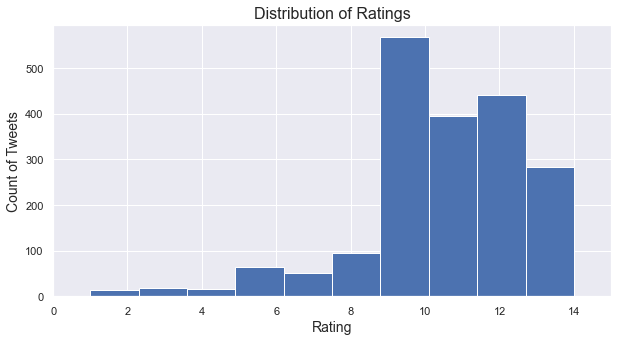

In [1361]:
plt.figure(figsize = (10,5))
data.rating.hist()
plt.title('Distribution of Ratings', fontsize = 16)
plt.xlim(0,15)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Count of Tweets', fontsize = 14);

> From the above, 75% of ratings are between 10 and 14 with its median being 12(50% of tweets are 12 and above).

### What are the Commonly rated dogs/breed?

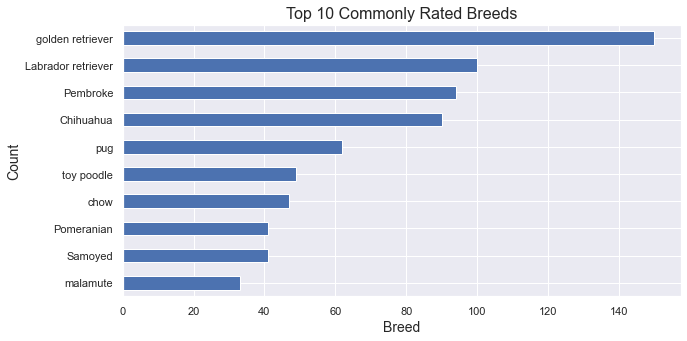

In [1362]:
data.groupby('breed').size().sort_values(ascending= False).head(11)[1:].plot(kind = 'barh', rot = 0, figsize = (10, 5))
plt.title('Top 10 Commonly Rated Breeds', fontsize = 16)
plt.xlabel('Breed', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.gca().invert_yaxis();

### Average rating by breed

In [1363]:
data.groupby('breed')['rating'].mean().sort_values(ascending = False)

breed
Bouvier des Flandres           13.000000
Saluki                         12.500000
briard                         12.333333
Tibetan mastiff                12.250000
Border terrier                 12.142857
                                 ...    
Unknown                         9.003311
Scotch terrier                  9.000000
Walker hound                    9.000000
soft-coated wheaten terrier     8.166667
Japanese spaniel                5.000000
Name: rating, Length: 114, dtype: float64

### Average Likes by breed

In [1364]:
data.groupby('breed')['favorite'].mean().sort_values(ascending = False).head(10)

breed
Bedlington terrier         21443.666667
Saluki                     20711.500000
French bulldog             17464.433333
Bouvier des Flandres       15297.000000
Afghan hound               14650.666667
black-and-tan coonhound    14617.000000
flat-coated retriever      14465.875000
Irish water spaniel        13918.666667
whippet                    12646.272727
Leonberg                   12610.333333
Name: favorite, dtype: float64

### Average Retweets by breed

In [1365]:
data.groupby('breed')['retweet'].mean().sort_values(ascending = False)

breed
Bedlington terrier    6652.833333
Afghan hound          4763.666667
standard poodle       4466.818182
French bulldog        4384.833333
English springer      4380.200000
                         ...     
EntleBucher            553.000000
Tibetan terrier        440.750000
Japanese spaniel       354.000000
Brabancon griffon      227.333333
groenendael            219.500000
Name: retweet, Length: 114, dtype: float64

### Top 5 most retweeted tweets

In [1366]:
top_5_retweet = data.sort_values(by='retweet', ascending = False)
top_5_retweet.head()

,tweet_id,timestamp,source,text,rating,name,dog_stage,retweet,favorite,breed
682,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,None,doggo,70316,144201,Labrador retriever
709,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,13.0,None,doggo,52619,106683,Eskimo dog
352,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13.0,Stephan,Unknown,51404,111155,Chihuahua
1930,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13.0,None,puppo,39740,123646,Lakeland terrier
52,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13.0,Duddles,Unknown,37251,92471,English springer


### Top 5 most liked tweets

In [1367]:
top_5_favorite = data.sort_values(by='favorite', ascending = False)
top_5_favorite.head()

,tweet_id,timestamp,source,text,rating,name,dog_stage,retweet,favorite,breed
682,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,None,doggo,70316,144201,Labrador retriever
1930,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13.0,None,puppo,39740,123646,Lakeland terrier
352,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13.0,Stephan,Unknown,51404,111155,Chihuahua
1726,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13.0,Jamesy,pupper,30049,108400,French bulldog
709,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,13.0,None,doggo,52619,106683,Eskimo dog


The above shows the top 5 most retweeted and liked tweets. Four of the top most retweeted tweets are also the in top 5 liked tweets.They also have a rating of 13.

### Rating vs retweet count

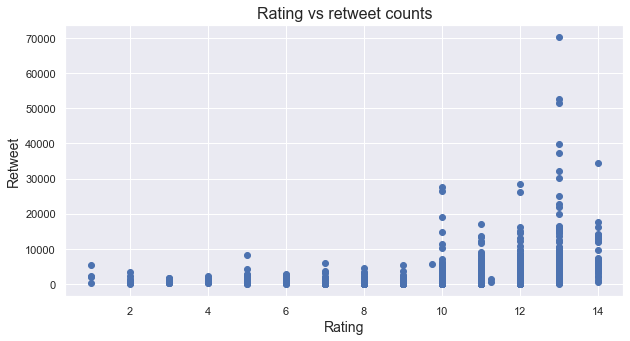

In [1368]:
plt.figure(figsize = (10,5))
plt.scatter(data.rating, data.retweet)
plt.title('Rating vs retweet counts', fontsize = 16)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Retweet', fontsize = 14);

### Rating vs favorite count

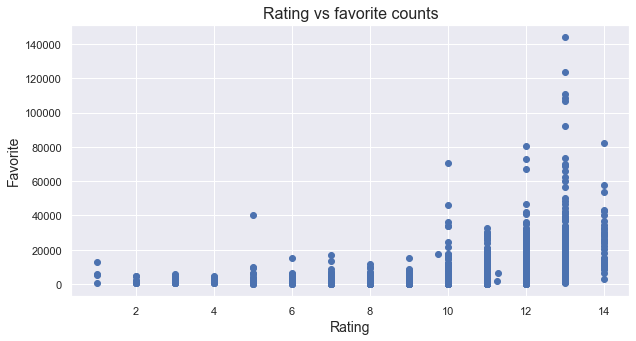

In [1369]:
plt.figure(figsize = (10,5))
plt.scatter(data.rating, data.favorite)
plt.title('Rating vs favorite counts', fontsize = 16)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Favorite', fontsize = 14);

### Is there a correlation between retweet and favorite count

Correlation:0.9282710673211306


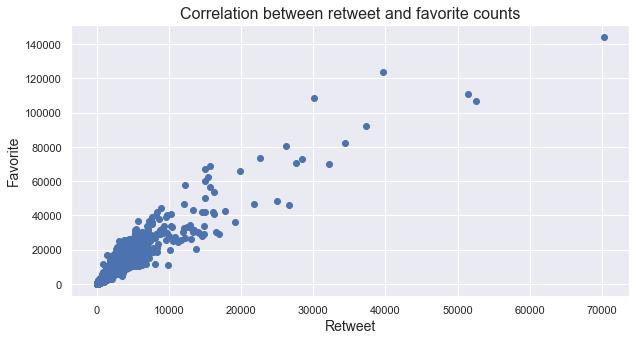

In [1370]:
plt.figure(figsize = (10,5))
plt.scatter(data.retweet, data.favorite)
plt.title('Correlation between retweet and favorite counts', fontsize = 16)
plt.xlabel('Retweet', fontsize = 14)
plt.ylabel('Favorite', fontsize = 14);

print('Correlation:' +  str(data.retweet.corr(data.favorite)))